In [11]:
%matplotlib inline
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style='ticks')
np.random.seed(sum(map(ord, 'axis_grids')))

In [12]:
tips = sns.load_dataset('tips')

In [13]:
print(Counter(tips.time))

Counter({'Dinner': 176, 'Lunch': 68})


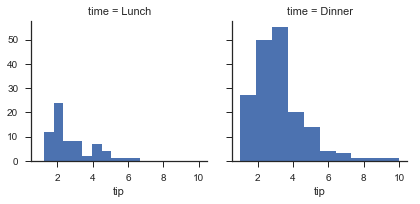

In [14]:
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, 'tip')


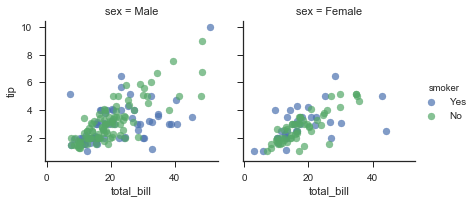

In [17]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=.7)
g.add_legend()


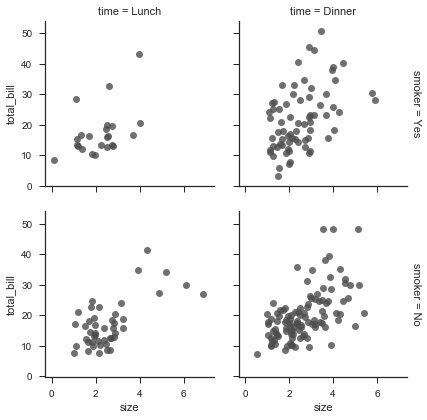

In [22]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='.3', fit_reg=False, x_jitter=-1)        


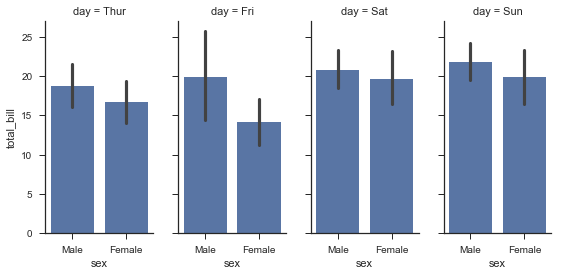

In [26]:
g = sns.FacetGrid(tips, col='day', size=4, aspect=.5)
g.map(sns.barplot, 'sex', 'total_bill')


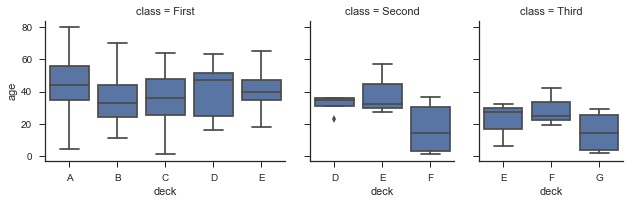

In [29]:
titanic = sns.load_dataset('titanic')
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values('deck')
g = sns.FacetGrid(titanic, col='class', sharex=False, \
                  gridspec_kws={'width_ratios':[5,3,3]})
g.map(sns.boxplot, 'deck', 'age')


CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


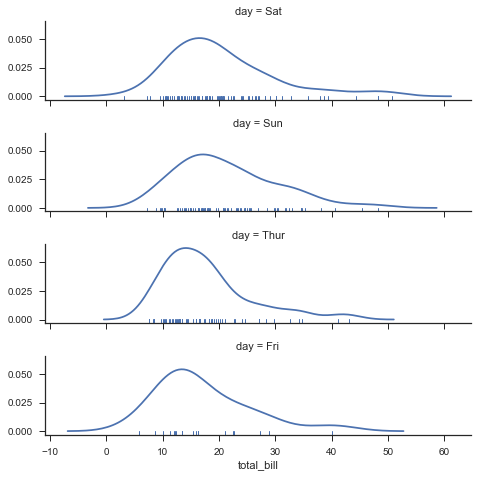

In [34]:
ordered_days = tips.day.value_counts().index
print(ordered_days)
g = sns.FacetGrid(tips, row='day', row_order=ordered_days,\
                 size=1.7, aspect=4)
g.map(sns.distplot, 'total_bill', hist=False, rug=True)


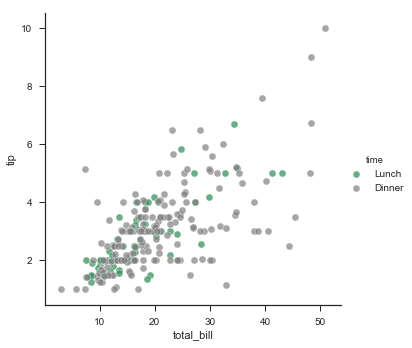

In [38]:
pal = dict(Lunch='seagreen', Dinner='gray')
g = sns.FacetGrid(tips, hue='time', palette=pal, size=5)
g.map(plt.scatter, 'total_bill', 'tip', s=50, alpha=.7, linewidth=.5, edgecolor='white')   
g.add_legend()

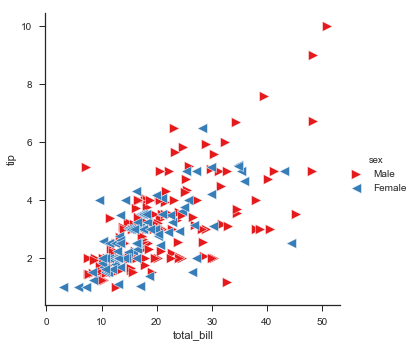

In [40]:
g = sns.FacetGrid(tips, hue='sex', palette='Set1', size=5, hue_kws={'marker':['>','<']})    
g.map(plt.scatter, 'total_bill', 'tip', s=100, linewidth=.5, edgecolor='white')  
g.add_legend()


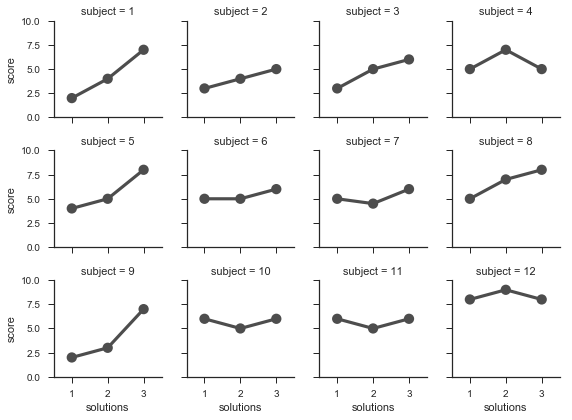

In [41]:
attend = sns.load_dataset('attention').query('subject <= 12')
g = sns.FacetGrid(attend, col='subject', col_wrap=4, size=2, ylim=(0,10))
g.map(sns.pointplot, 'solutions', 'score', color='.3', ci=None)


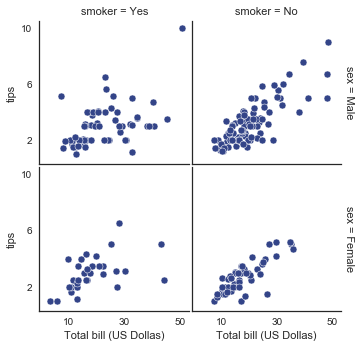

In [42]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips, row='sex', col='smoker', margin_titles=True, size=2.5)    
g.map(plt.scatter, 'total_bill', 'tip', color='#334488', edgecolor='white', lw=.5)    
g.set_axis_labels('Total bill (US Dollas)', 'tips')
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, hspace=.02)
    

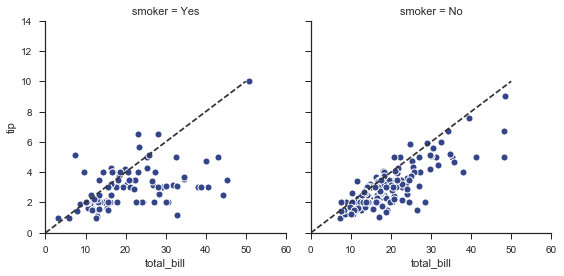

In [44]:
g = sns.FacetGrid(tips, col='smoker', margin_titles=True, size=4)
g.map(plt.scatter, 'total_bill', 'tip', color='#334488', edgecolor='white', s=50, lw=1)   
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14))



# Mapping custom functions onto the grid

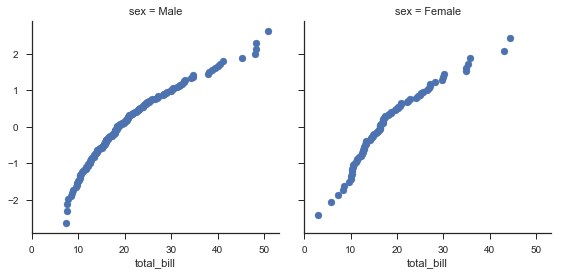

In [45]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", size=4)
g.map(quantile_plot, "total_bill")

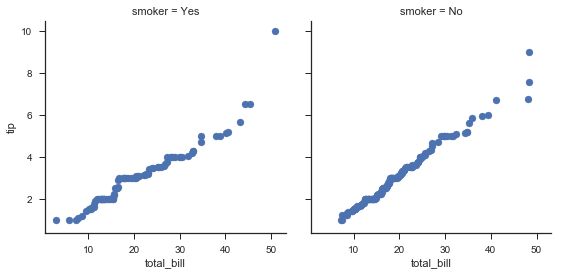

In [46]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", size=4)
g.map(qqplot, "total_bill", "tip")

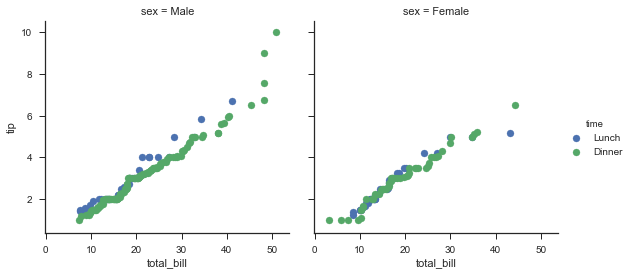

In [47]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

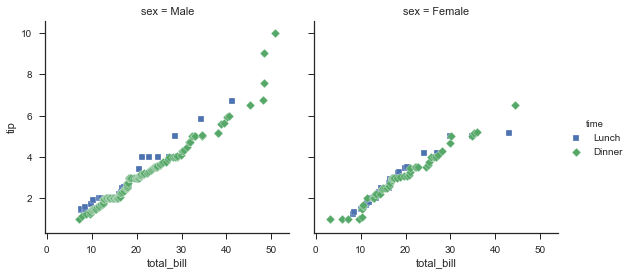

In [48]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend()

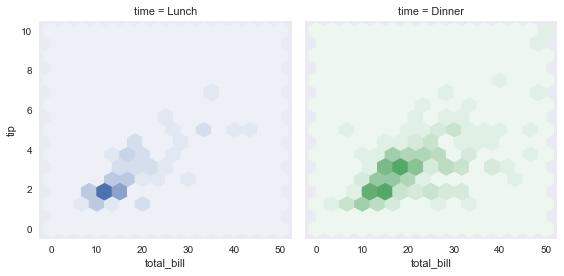

In [51]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])

# Plotting pairwise relationships in a dataset

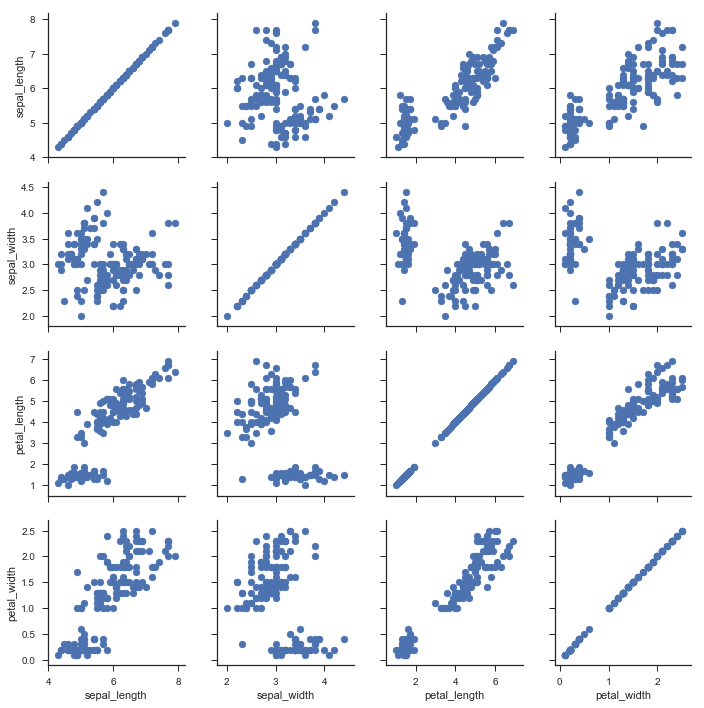

In [56]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map(plt.scatter)

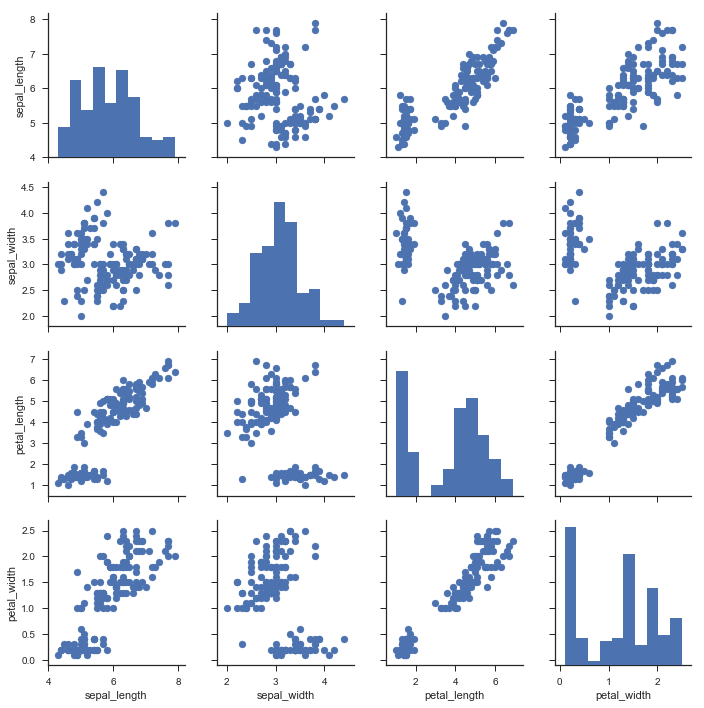

In [57]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

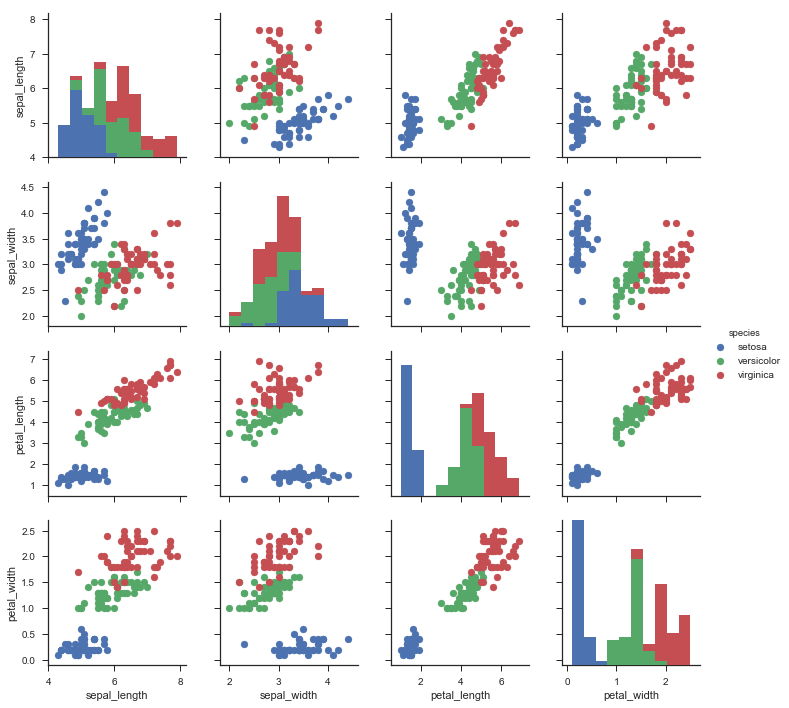

In [58]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

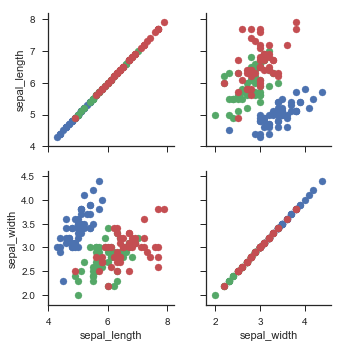

In [59]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")   
g.map(plt.scatter)

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


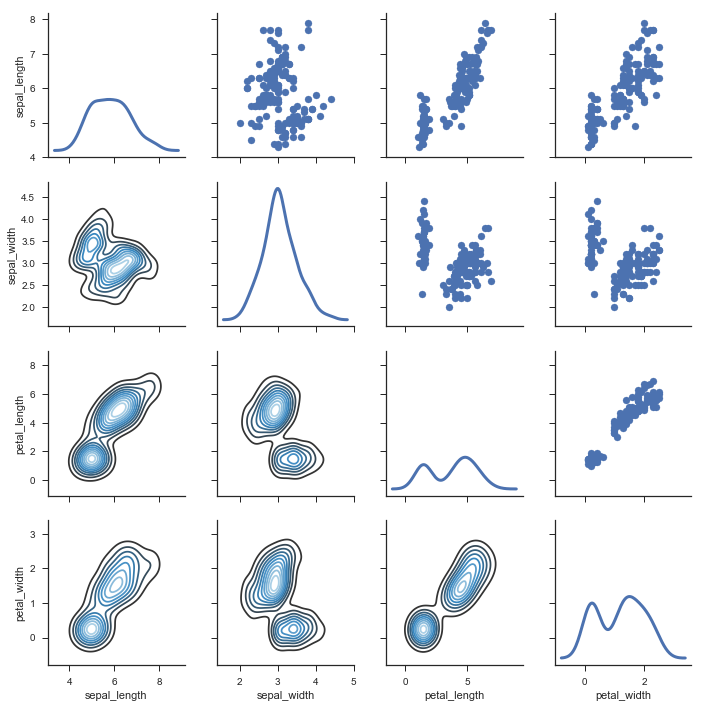

In [60]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False)

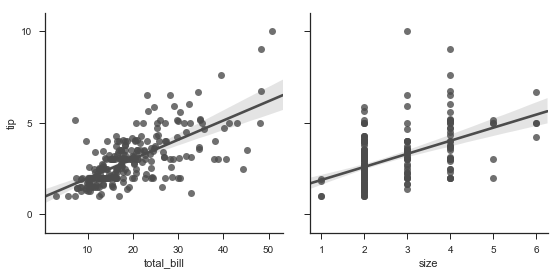

In [63]:
g = sns.PairGrid(tips, y_vars=['tip'], x_vars=['total_bill','size'], size=4)   
g.map(sns.regplot, color='.3')
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

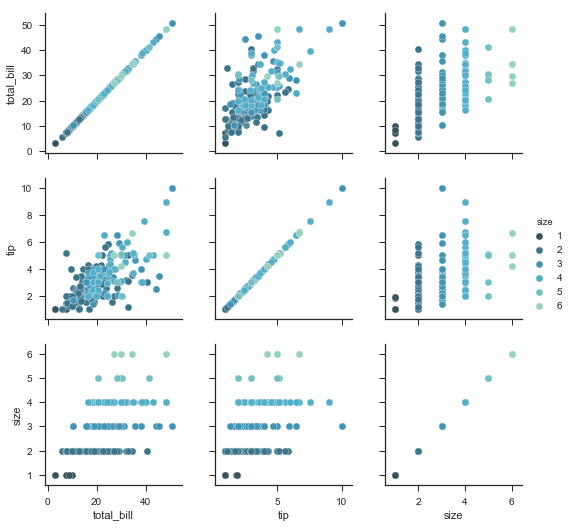

In [66]:
g = sns.PairGrid(tips, hue='size', palette='GnBu_d')
g.map(plt.scatter, s=50, edgecolor='white')
g.add_legend()

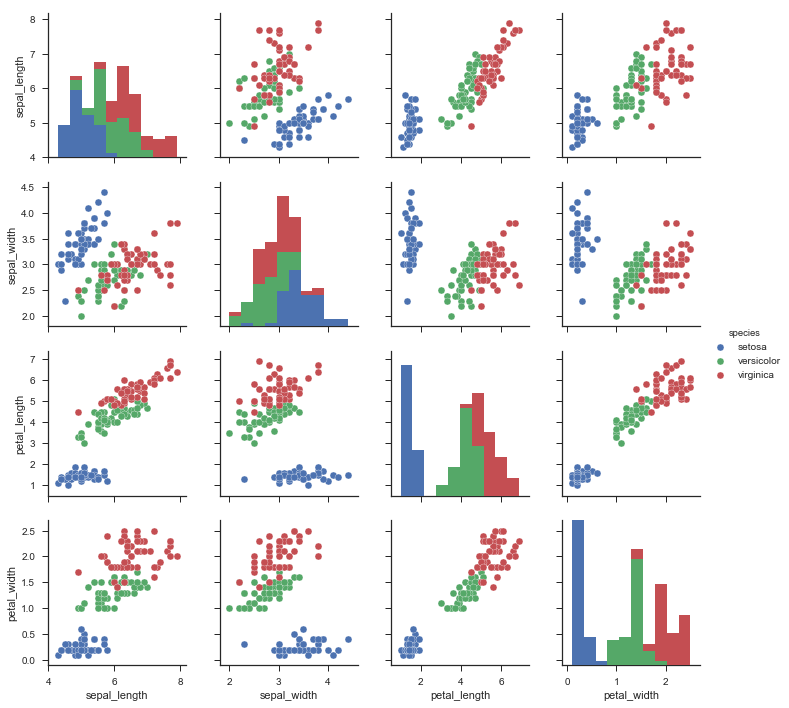

In [67]:
sns.pairplot(iris, hue='species', size=2.5)

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


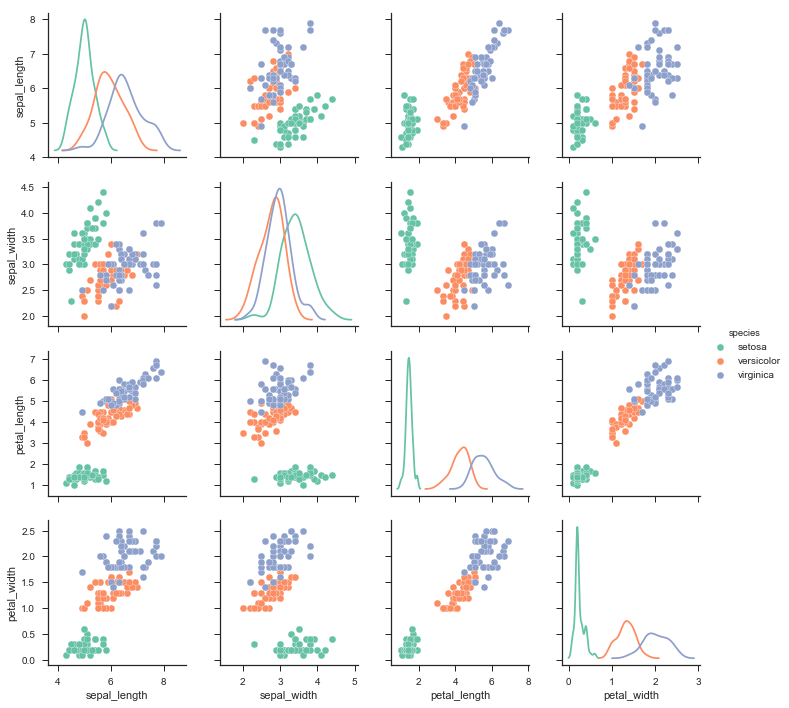

In [68]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)  
